# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [85]:
# 環境準備，使用 Python NumPy、Pandas、seaborn
import pandas as pd
import numpy as np
import seaborn as sb

In [86]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_Titanic/main/raw_data/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [87]:
print('實驗資料大小:',df_train.shape)

實驗資料大小: (891, 12)


In [88]:
# 查看你資料列的對應值，初步了解有什麼特徵
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [89]:
# 用Survived和船票等級(Pclass)實做KDE，可以更清楚的看出船票等級與存活之間的關係
# 概念上很單純的「將長條圖改畫成折線圖」這個動作，有個專有名詞叫做【核密度估計(Kernel Density Estimation, KDE)】
# 要確定各欄位與'Survived'關係，數值型、沒缺少值才可做KDE

import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# 得出哪些人存活那些死，之於船票等級Pclass
pclass_not_survived = df_train[df_train['Survived'] == 0]['Pclass']
pclass_survived = df_train[df_train['Survived'] == 1]['Pclass']

# 高斯核密度估計，使用gaussian_kde()函數
kde_not_survived = gaussian_kde(pclass_not_survived)
kde_survived = gaussian_kde(pclass_survived)

# 設置範圍，將Pclassc劃分1000個點用來畫線
pclass_range = np.linspace(0, df_train['Pclass'].max(), 1000)

# 計算估計密度，計算出有活沒活的線型數值
density_not_survived = kde_not_survived(pclass_range)
density_survived = kde_survived(pclass_range)

# 構建一個圖形板
fig = go.Figure()


# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = pclass_range,
    y = density_not_survived,
    mode = 'lines',
    name = 'Not Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = pclass_range,
    y = density_survived,
    mode = 'lines',
    name = 'Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightgreen')
))

# 圖形板佈局
fig.update_layout(
    title = 'KDE Plot of Pclass by Survival Status',
    xaxis_title = 'Pclass',
    yaxis_title = 'Density',
    width = 1000,
    height = 400
)

fig.show()

# 結論:船艙等級越高存活率越高

<Axes: xlabel='Pclass', ylabel='Survived'>

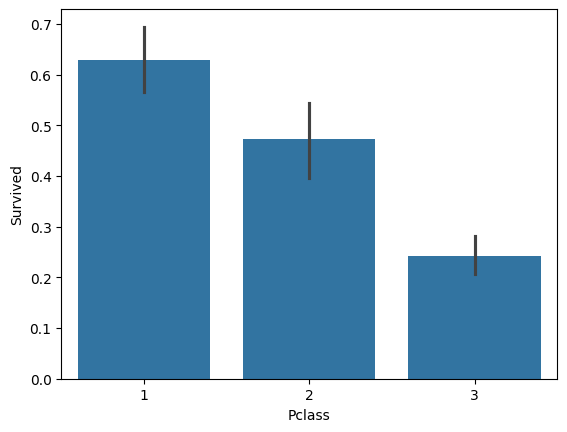

In [90]:
# 確實所屬的艙等較高，比較容易存活
sb.barplot(data = df_train,x = 'Pclass',y = 'Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

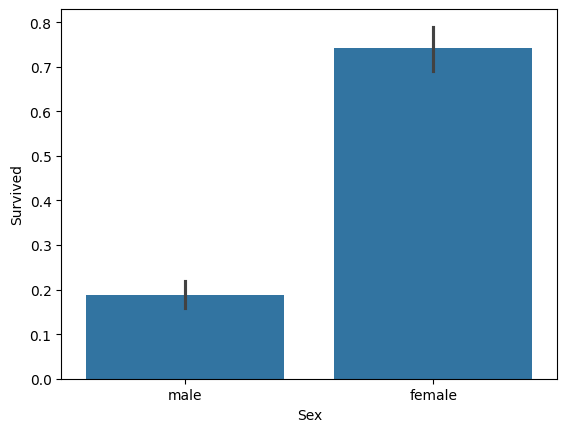

In [91]:
# 女性生存率比較高，符合電影裡的男士斷後
sb.barplot(data = df_train,x = 'Sex',y = 'Survived')

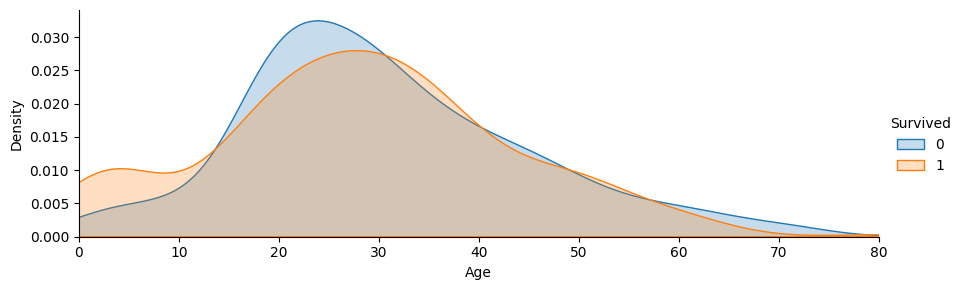

In [92]:
# 建立座標軸
ageFacet = sb.FacetGrid(df_train,hue = 'Survived',aspect = 3) # hue:要映射的參數 aspect:x軸和y軸縱橫比

# 作圖，選擇圖形參數、類型
ageFacet.map(sb.kdeplot,'Age',fill = True)

# 其他資訊：座標軸範圍
ageFacet.set(xlim = (0,df_train['Age'].max()))

# 展示圖例
ageFacet.add_legend()

# 結論: 當乘客年齡層在0-10歲時存活率會較高，於18-30歲存活率較低

In [93]:
# 旁系血親(SibSp)的KDE(siblings/spouses)

# 得出哪些人存活那些死，之於SibSp
sibsp_not_survived = df_train[df_train['Survived'] == 0]['SibSp']
sibsp_survived = df_train[df_train['Survived'] == 1]['SibSp']

# 高斯核密度估計，使用gaussian_kde()函數
kde_not_survived = gaussian_kde(sibsp_not_survived)
kde_survived = gaussian_kde(sibsp_survived)

# 設置範圍
sibsp_range = np.linspace(0, df_train['SibSp'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(sibsp_range)
density_survived = kde_survived(sibsp_range)

# 構建一個圖形板
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = sibsp_range,
    y = density_not_survived,
    mode = 'lines',
    name = 'Not Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = sibsp_range,
    y = density_survived,
    mode = 'lines',
    name = 'Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightgreen')
))

# 圖形板佈局
fig.update_layout(
    title = 'KDE Plot of SibSp by Survival Status',
    xaxis_title = 'SibSp',
    yaxis_title = 'Density',
    width = 1000,
    height = 400
)

fig.show()

# 結論:旁系血親少，存活率可能較高

In [94]:
# 直系血親(Parch)的KDE(Parents/Children)

# 得出哪些人存活那些死，之於Parch
parch_not_survived = df_train[df_train['Survived'] == 0]['Parch']
parch_survived = df_train[df_train['Survived'] == 1]['Parch']

# 高斯核密度估計，使用gaussian_kde()函數
kde_not_survived = gaussian_kde(parch_not_survived)
kde_survived = gaussian_kde(parch_survived)

# 設置範圍
parch_range = np.linspace(0, df_train['Parch'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(parch_range)
density_survived = kde_survived(parch_range)

# 構建一個圖形板
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = parch_range,
    y = density_not_survived,
    mode = 'lines',
    name = 'Not Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = parch_range,
    y = density_survived,
    mode = 'lines',
    name = 'Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightgreen')
))

# 圖形板佈局
fig.update_layout(
    title = 'KDE Plot of Parch by Survival Status',
    xaxis_title = 'Parch',
    yaxis_title = 'Density',
    width = 1000,
    height = 400
)

fig.show()

# 結論:直系血親適中，存活率可能較高

<Axes: xlabel='Parch', ylabel='Survived'>

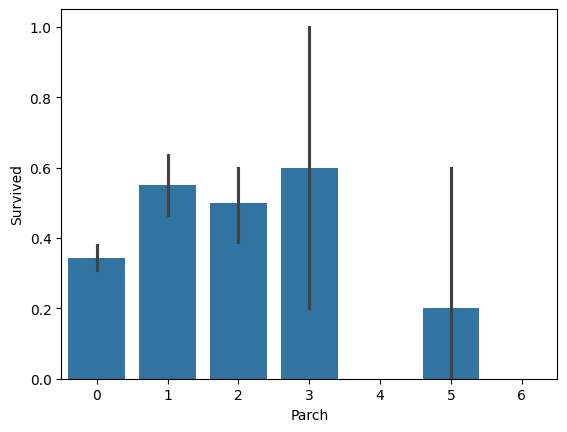

In [95]:
# 可以看出直系血親數量適中時，存活率較高
sb.barplot(data = df_train,x = 'Parch',y = 'Survived')

In [96]:
# 船票價格(Fare)的KDE
from scipy.stats import gaussian_kde

# 得出哪些人存活那些死，之於Fare
fare_not_survived = df_train[df_train['Survived'] == 0]['Fare']
fare_survived = df_train[df_train['Survived'] == 1]['Fare']

# 高斯核密度估計，使用gaussian_kde()函數
kde_not_survived = gaussian_kde(fare_not_survived)
kde_survived = gaussian_kde(fare_survived)

# 設置範圍
fare_range = np.linspace(0, df_train['Fare'].max(), 1000)

# 計算估計密度
density_not_survived = kde_not_survived(fare_range)
density_survived = kde_survived(fare_range)

# 構建一個圖形板
fig = go.Figure()

# 未生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = fare_range,
    y = density_not_survived,
    mode = 'lines',
    name = 'Not Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightcoral')
))

# 生還乘客的 KDE 曲線
fig.add_trace(go.Scatter(
    x = fare_range,
    y = density_survived,
    mode = 'lines',
    name = 'Survived',
    fill = 'tozeroy',
    line = dict(color = 'lightgreen')
))

# 圖形板佈局
fig.update_layout(
    title = 'KDE Plot of Fare by Survival Status',
    xaxis_title = 'Fare',
    yaxis_title = 'Density',
    width = 1000,
    height = 400
)

fig.show()

# 結論:船票價格越高，存活率較高

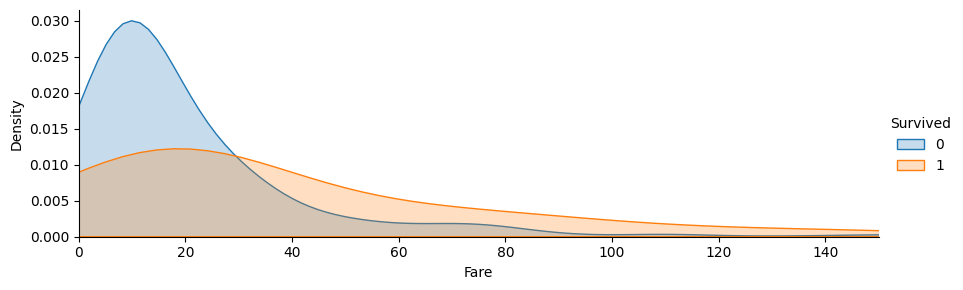

In [97]:
# 建立座標軸
ageFacet = sb.FacetGrid(df_train,hue = 'Survived',aspect = 3) # hue:要映射的參數 aspect:x軸和y軸縱橫比

# 作圖，選擇圖形參數、類型
ageFacet.map(sb.kdeplot,'Fare',fill=True)

# 其他資訊：座標軸範圍
ageFacet.set(xlim = (0,150))

# 展示圖例
ageFacet.add_legend()

# 結論:票價低於30元時，存活率大幅降低，票價越高存活率愈高

In [98]:
# 計算不同類型(登船地)embarked的乘客，其存活率為多少
# 用.value_counts(normalize=True)計算各分類的占比
print('Embarked為"S"的乘客，其生存率為%.2f'%df_train['Survived'][df_train['Embarked']=='S'].value_counts(normalize=True)[1])
print('Embarked為"Q"的乘客，其生存率為%.2f'%df_train['Survived'][df_train['Embarked']=='Q'].value_counts(normalize=True)[1])
print('Embarked為"C"的乘客，其生存率為%.2f'%df_train['Survived'][df_train['Embarked']=='C'].value_counts(normalize=True)[1])

Embarked為"S"的乘客，其生存率為0.34
Embarked為"Q"的乘客，其生存率為0.39
Embarked為"C"的乘客，其生存率為0.55


<Axes: xlabel='Embarked', ylabel='Survived'>

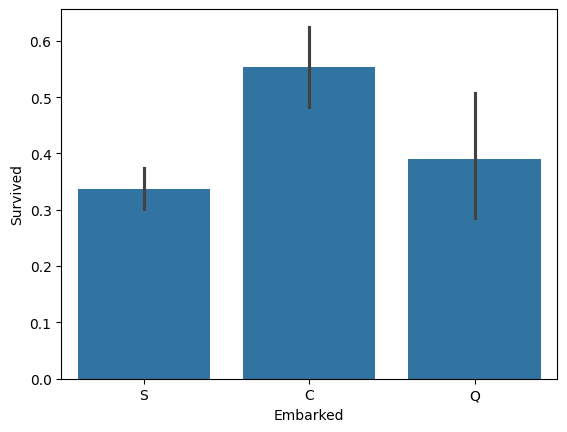

In [99]:
# 不同類型embarked的乘客，其存活率為多少的圖
sb.barplot(data = df_train,x = 'Embarked',y = 'Survived')

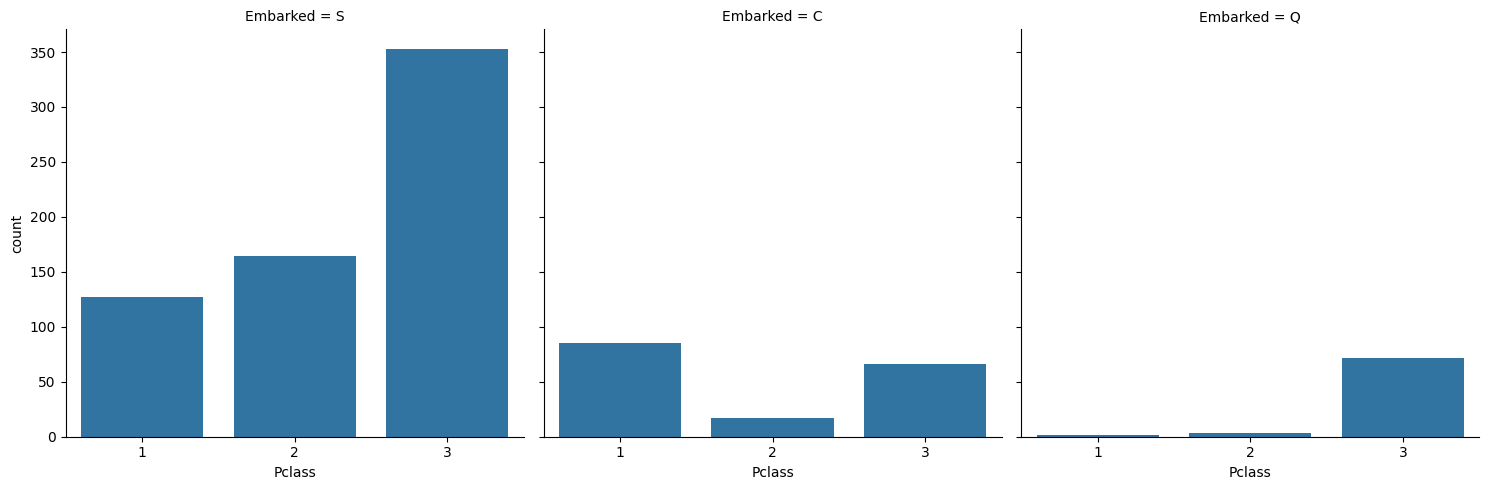

In [100]:
# 看看各登船地點的船艙等級
sb.catplot(data = df_train,x = 'Pclass',col = 'Embarked',kind = 'count')

# 結論:法國登船乘客存活率較高原因可能與其頭等艙乘客比例較高有關

# 2.數據清洗

In [101]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
# 讀取資料、查看空值有哪些
df_train.isna().sum()

# 可以看到年齡(Age)和艙位號(Cabin)的空值很多，登船點(Embarked)很少

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [103]:
# 對Cabin(船艙號碼)缺失值進行處理，利用U（Unknown）填充缺失值
df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_train['Cabin'].head()

,Cabin
0,U
1,C85
2,U
3,C123
4,U


In [104]:
# 用isnull()查看缺失值狀況，可以看到有兩筆空值
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [105]:
# 查看Embarked資料分佈狀況
df_train['Embarked'].value_counts()

# 結論:查看Embarked資料分佈情況，可知在英國南安普敦登船可能性最大，因此以此填充缺失值。

,count
Embarked,
S,644
C,168
Q,77


In [106]:
# 填充缺失值為S
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [107]:
# 讀取資料、查看空值有哪些
df_train.isna().sum()

# 年齡(Age)的空值部分打算等特徵工程完成後得到更多樣的特徵時，用隨機森林填充試試看
# 其他空值完成填充

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


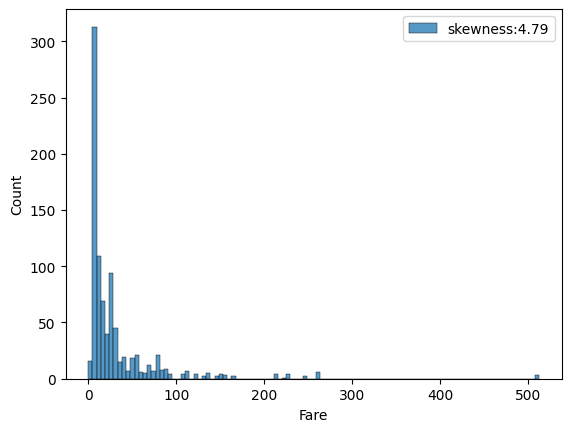

In [108]:
# 查看fare分佈
farePlot = sb.histplot(df_train['Fare'][df_train['Fare'].notnull()],label = 'skewness:%.2f'%(df_train['Fare'].skew()))
farePlot.legend(loc = 'best')

# 結論:fare的分佈呈現左偏的形態，其偏度skewness=4.37較大，說明資料偏移平均值較多，
# 因為資料服從常態分佈時，機器學習較易學得精準，因此我們需要對資料進行對數化處理，
# 對數化處理就是取log防止資料權重分佈不均勻。

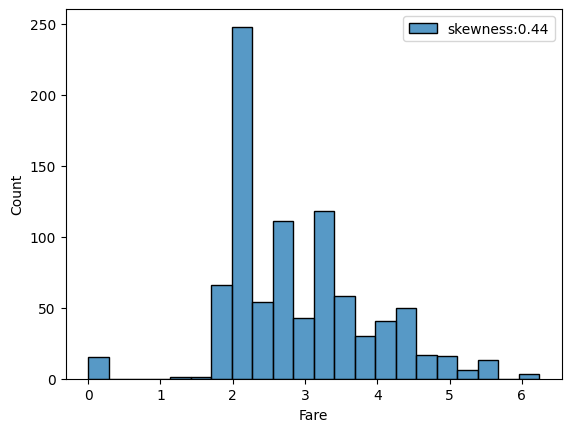

In [109]:
# 對數化處理fare值
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x>0 else 0)

# 查看fare分佈
farePlot = sb.histplot(df_train['Fare'][df_train['Fare'].notnull()],label = 'skewness:%.2f'%(df_train['Fare'].skew()))
farePlot.legend(loc = 'best')

# 結論: 調整後的圖形較為合理

# 3.特徵工程

In [110]:
# 將男性設為1，女性設為0，方便之後做分析
df_train['Sex'] = df_train['Sex'].map({"male": 1, "female": 0})

In [111]:
# 建構新特徵Title
# 使用.map填充特徵Title(依序把Name取出來轉換後填充到Title)
# 使用 .split() 方法將字串拆分出來，遇到','就拆分[1]只擷取第2個字串
# 使用 .split() 方法將字串拆分出來，遇到'.'就拆分[0]只擷取第1個字串
# Python strip() 方法用於移除字串頭尾指定的字元（預設為空格或換行符）
df_train['Title'] = df_train['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

# 查看Title資料分佈
df_train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [112]:
# 查看新特徵Title
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,U,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,U,S,Mr
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,2.135148,U,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,3.948596,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,3.048088,U,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,2.409941,U,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,3.403555,U,C,Mrs


In [113]:
# 將Title資訊進行整合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

# 用.map()把TitleDict依序填充至Title
df_train['Title'] = df_train['Title'].map(TitleDict)

# 查看Title資料分佈
df_train['Title'].value_counts()

,count
Title,
Mr,517
Miss,184
Mrs,127
Master,41
Officer,18
Royalty,4


<Axes: xlabel='Title', ylabel='Survived'>

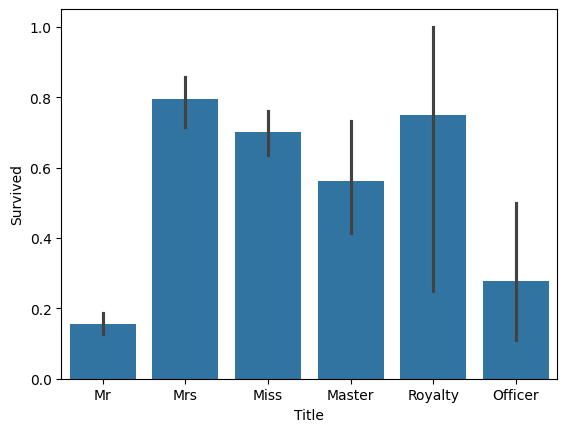

In [114]:
# 視覺化分析Title與Survived之間關係
sb.barplot(data = df_train,x = 'Title',y = 'Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

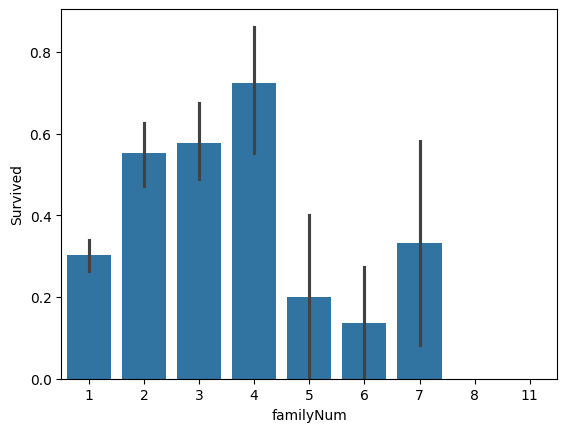

In [115]:
# 建構新特徵familyNum
# 在船上同為家族的父母及小孩的數目+在船上同為兄弟姐妹或配偶的數目+自己=家庭成員數量
df_train['familyNum'] = df_train['Parch'] + df_train['SibSp'] + 1

# 查看familyNum與Survived的關係
sb.barplot(data = df_train,x = 'familyNum',y = 'Survived')

<Axes: xlabel='Deck', ylabel='Survived'>

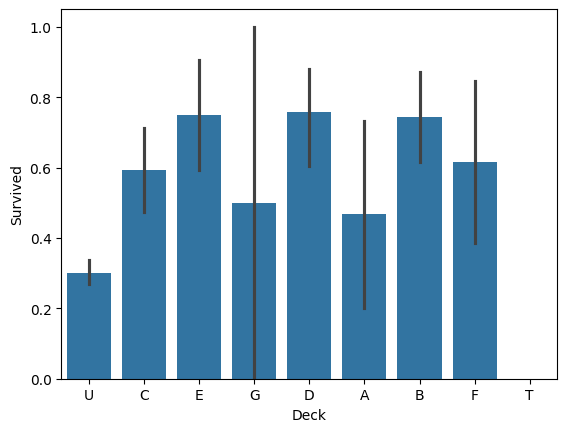

In [116]:
# 建構新特徵Deck
# 提取Cabin(船艙號碼)字段首字母作為Deck(船艙類型)
df_train['Deck'] = df_train['Cabin'].map(lambda x: x[0])

# 查看不同Deck类型乘客的生存率
sb.barplot(data = df_train, x = 'Deck', y = 'Survived')

In [117]:
# 查看各票號的乘客數量
TickCountDict = {}
TickCountDict = df_train['Ticket'].value_counts()
TickCountDict.head()

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6


In [118]:
# 將同票號乘客數量資料新增為新特徵TickCom(共同車票TicketCommon)
df_train['TickCom'] = df_train['Ticket'].map(TickCountDict)
df_train['TickCom'].head(10)

,TickCom
0,1
1,1
2,1
3,2
4,1
5,1
6,1
7,4
8,3
9,2


<Axes: xlabel='TickCom', ylabel='Survived'>

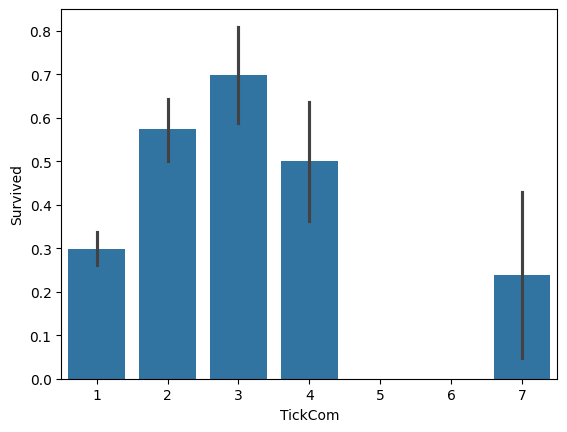

In [119]:
# 查看TickCot與Survived之間關係
sb.barplot(data = df_train,x = 'TickCom',y = 'Survived')

In [120]:
# 查看Age缺失值情況，等等用隨機森林模型預測缺失的數據
df_train[df_train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,Deck,TickCom
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,2.135148,U,Q,Mr,1,U,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,2.564949,U,S,Mr,1,U,1
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,1.977547,U,C,Mrs,1,U,1
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,1.977547,U,C,Mr,1,U,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,2.064226,U,Q,Miss,1,U,1


In [121]:
# 篩選資料集
AgePre = df_train[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCom','Sex']]
AgePre.head()

,Age,Parch,Pclass,SibSp,Title,familyNum,TickCom,Sex
0,22.0,0,3,1,Mr,2,1,1
1,38.0,0,1,1,Mrs,2,1,0
2,26.0,0,3,0,Miss,1,1,0
3,35.0,0,1,1,Mrs,2,2,0
4,35.0,0,3,0,Mr,1,1,1


In [122]:
# 對AgePre進行one-hot編碼
# 獨熱編碼（One-Hot Encoding）是將離散特徵編碼的一種常用方法，其目的是將分類變數轉換為可用於機器學習演算法模型訓練的數字表示。
AgePre = pd.get_dummies(AgePre)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,3,1,2,1,1,False,False,True,False,False,False
1,38.0,0,1,1,2,1,0,False,False,False,True,False,False
2,26.0,0,3,0,1,1,0,False,True,False,False,False,False
3,35.0,0,1,1,2,2,0,False,False,False,True,False,False
4,35.0,0,3,0,1,1,1,False,False,True,False,False,False


In [123]:
# 對AgePre中的Parch進行one-hot編碼
ParAge = pd.get_dummies(AgePre['Parch'],prefix = 'Parch')
ParAge.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [124]:
# 對AgePre中的SibSp和Pclass進行one-hot編碼
SibAge = pd.get_dummies(AgePre['SibSp'],prefix = 'SibSp')
PclAge = pd.get_dummies(AgePre['Pclass'],prefix = 'Pclass')
SibAge.head()
# ParAge.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False


In [125]:
# 查看各變數與Age間相關性
AgeCorrDf = pd.DataFrame()
AgeCorrDf = AgePre.corr()
AgeCorrDf['Age'].sort_values()

,Age
Title_Master,-0.390078
Pclass,-0.369226
SibSp,-0.308247
familyNum,-0.301914
Title_Miss,-0.278113
TickCom,-0.253507
Parch,-0.189119
Title_Royalty,0.066189
Sex,0.093254
Title_Mrs,0.176950


In [126]:
# 根據相關性，拼接相關數據
AgePre = pd.concat([AgePre,ParAge,SibAge,PclAge],axis = 1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Sex,Title_Master,Title_Miss,Title_Mr,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,1,False,False,True,...,False,True,False,False,False,False,False,False,False,True
1,38.0,0,1,1,2,1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,26.0,0,3,0,1,1,0,False,True,False,...,True,False,False,False,False,False,False,False,False,True
3,35.0,0,1,1,2,2,0,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,35.0,0,3,0,1,1,1,False,False,True,...,True,False,False,False,False,False,False,False,False,True


In [127]:
# 拆分訓練集和預測集
AgeKnown = AgePre[AgePre['Age'].notnull()]
AgeUnKnown = AgePre[AgePre['Age'].isnull()]

# 產生訓練集的特徵和標籤
AgeKnown_X = AgeKnown.drop(['Age'],axis = 1)
AgeKnown_y = AgeKnown['Age']

# 產生預測集的特徵
AgeUnKnown_X = AgeUnKnown.drop(['Age'],axis = 1)

# 利用隨機森林建構模型
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500,n_jobs = -1) # n_estimators:500棵樹 # n_jobs:全部cpu使用
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [128]:
# 模型得分
rfr.score(AgeKnown_X,AgeKnown_y)

0.5863806779302051

In [129]:
# 預測年齡
AgeUnKnown_y = rfr.predict(AgeUnKnown_X)

# 填充預測數據
df_train.loc[df_train['Age'].isnull(),['Age']] = AgeUnKnown_y

# 此時已無缺失值
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  familyNum    891 non-null    int64  
 14  Deck         891 non-null    object 
 15  TickCom      891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


# 4.相關性分析

In [130]:
# 選擇可以量化的特徵
train_Sel = df_train.drop(['Cabin','Name','Ticket','PassengerId','Embarked','Title','Deck'],axis = 1)

# 查看各特徵與標籤的相關性
corrDf = pd.DataFrame()
corrDf = train_Sel.corr()
corrDf['Survived'].sort_values(ascending = True)

,Survived
Sex,-0.543351
Pclass,-0.338481
Age,-0.067485
SibSp,-0.035322
familyNum,0.016639
TickCom,0.038247
Parch,0.081629
Fare,0.331805
Survived,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Sex'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'SibSp'),
  Text(0, 5.5, 'Parch'),
  Text(0, 6.5, 'Fare'),
  Text(0, 7.5, 'familyNum'),
  Text(0, 8.5, 'TickCom')])

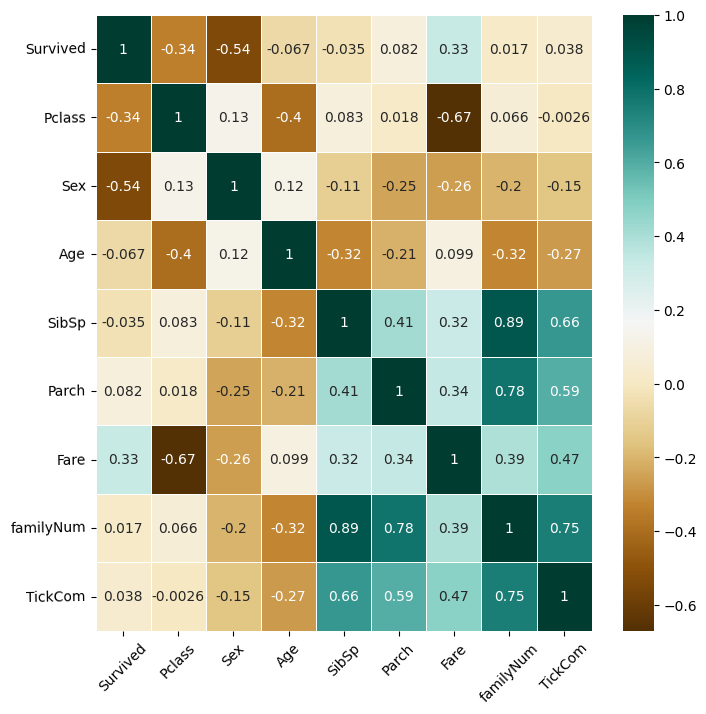

In [131]:
# 熱力圖，查看Survived與其他特徵間相關性大小

import matplotlib.pyplot as plt

plt.figure(figsize = (8,8)) # 設定視窗尺寸

# data.corr()表示了data中的兩個變數之間的相關性，取值範圍為[-1,1],取值接近-1，表示反相關，類似反比例函數，取值接近1，表正相關。
sb.heatmap(train_Sel.corr(),cmap = 'BrBG',annot = True,linewidths = 0.5) # cmap:顏色 annot:格子裡面要不要填充值 linewidths:線條寬度

plt.xticks(fontsize = 10,rotation = 45) # 文字大小，旋轉角度
plt.yticks(fontsize = 10,rotation = 1)  # 文字大小，旋轉角度

In [132]:
# 根據圖表刪除相關度很低的特徵
train_Sel = train_Sel.drop(['familyNum','SibSp','TickCom','Parch'],axis = 1)

# 顯示所選特徵
train_Sel.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,1.981001
1,1,1,0,38.0,4.266662
2,1,3,0,26.0,2.070022
3,1,1,0,35.0,3.972177
4,0,3,1,35.0,2.085672


In [133]:
# 查看特徵內容
train_Sel.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,1.981001
1,1,1,0,38.0,4.266662
2,1,3,0,26.0,2.070022
3,1,1,0,35.0,3.972177
4,0,3,1,35.0,2.085672


# 5.訓練模型

In [134]:
# 產生訓練集的特徵和標籤
preData_X = train_Sel.drop('Survived',axis=1)
preData_y = train_Sel['Survived']


# 導入機器學習演算法庫
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

# 用StratifiedKFold()設定名為kfold的generator，交叉採樣法拆分資料集
# 後面用這個generator代入X和y可以得到分好一份一份的訓練集和測試集序號
# 所謂K折交叉驗證就是將資料集分為K份，先拿其中的K-1份當作訓練集，另外一份當作測試集，依序進行K次（讓每份資料輪流當測試集） 。將K次實驗的結果取平均值就是最終的結果。
# n_splits：預設為3，表示將資料分成多少份，即k折交叉驗證中的k
kfold = StratifiedKFold(n_splits = 10)

# 匯總不同模型演算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [135]:
# 不同機器學習交叉驗證結果總合
cv_results=[]
for classifier in classifiers:
    # 用交叉驗證函數cross_val_score()取得個名行評分
    cv_results.append(cross_val_score(classifier,preData_X,preData_y,scoring='accuracy',cv=kfold,n_jobs=-1))
# 參數說​​明
# estimator：您要訓練和評估的模型。
# X：訓練模型的輸入特徵。
# y：與輸入特徵關聯的輸出標籤。
# cv：交叉驗證次數。我們將其設為kfold。
# scoring：評估模型的指標，當我們處理分類問題時，我們將使用準確性。
# n_jobs=-1 表示使用所有可用的核心並行運算

# 顯示各個模型每次的評分
cv_results

[array([0.63333333, 0.62921348, 0.6741573 , 0.7752809 , 0.69662921,
        0.6741573 , 0.68539326, 0.70786517, 0.79775281, 0.66292135]),
 array([0.77777778, 0.79775281, 0.70786517, 0.7752809 , 0.84269663,
        0.75280899, 0.82022472, 0.76404494, 0.76404494, 0.75280899]),
 array([0.81111111, 0.84269663, 0.73033708, 0.79775281, 0.88764045,
        0.83146067, 0.85393258, 0.76404494, 0.84269663, 0.86516854]),
 array([0.78888889, 0.79775281, 0.71910112, 0.7752809 , 0.86516854,
        0.80898876, 0.83146067, 0.78651685, 0.79775281, 0.85393258]),
 array([0.81111111, 0.78651685, 0.76404494, 0.83146067, 0.91011236,
        0.83146067, 0.83146067, 0.79775281, 0.86516854, 0.84269663]),
 array([0.73333333, 0.7752809 , 0.64044944, 0.76404494, 0.7752809 ,
        0.70786517, 0.82022472, 0.75280899, 0.80898876, 0.78651685]),
 array([0.77777778, 0.79775281, 0.75280899, 0.84269663, 0.79775281,
        0.78651685, 0.78651685, 0.7752809 , 0.80898876, 0.79775281]),
 array([0.8       , 0.79775281, 0.

In [136]:
# 求模型得分的平均數和標準差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# 匯總數據
cvResDf = pd.DataFrame({'cv_mean':cv_means,'cv_std':cv_std,
              'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

# 顯示各個模型得分的平均值和標準差
cvResDf

,cv_mean,cv_std,algorithm
0,0.693670,0.052225,SVC
1,0.775531,0.035893,DecisionTreeCla
2,0.822684,0.045388,RandomForestCla
3,0.802484,0.039542,ExtraTreesCla
4,0.827179,0.039218,GradientBoostingCla
5,0.756479,0.049862,KNN
6,0.792385,0.022438,LR
7,0.791236,0.033459,LinearDiscrimiAna


[(0.6, 0.9)]

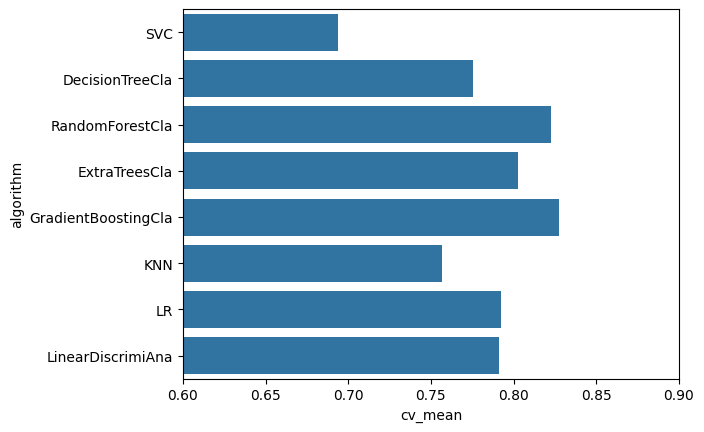

In [137]:
# 視覺化查看不同演算法的表現情況
cvResFacet = sb.barplot(data = cvResDf,x = 'cv_mean',y = 'algorithm')

# 設定顯示範圍
cvResFacet.set(xlim = (0.6,0.9))

In [138]:
# 選取表現較好的GBC模型來調優
# 建立GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()

# 超參數調優測試
# 網格搜尋是一種系統的超參數調優方法，透過窮舉預先定義的超參數空間，找到最佳的超參數組合。
gb_param_grid = {'loss' : ["log_loss"],
              'n_estimators' : [100,200,300], # 森林中樹木的數量
              'learning_rate': [0.1, 0.05, 0.01], # 每次迭代的步長
              'max_depth': [4, 8], # 限制樹的最大深度，超過設定深度的樹枝全部剪掉
              'min_samples_leaf': [100,150],  # 一個節點在分枝後每個子節點都必須包含至少min_samples_leaf個訓練樣本
              'max_features': [0.3, 0.1]  # 分割節點時特徵子集的大小上限
              }

# 用於verbose=0訓練期間無輸出，這是預設行為
# 用於verbose=1取得基本進度更新，例如目前的助推輪
# 用於verbose>1更詳細的輸出，包括每輪提升的損失
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv = kfold, scoring = "accuracy", n_jobs = -1, verbose = 1)

# 開始訓練模型
modelgsGBC.fit(preData_X,preData_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['log_loss'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [139]:
# modelgsGBC模型
print('modelgsGBC模型得分為：%.3f'%modelgsGBC.best_score_)

modelgsGBC模型得分為：0.825


In [140]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
modelgsGBCtestpre_y=modelgsGBC.predict(preData_X)

# 用confusion_matrix(y_true, y_pred)比較預測與現實的差異實作混淆矩陣
# 用.astype(str)把輸出轉換成str類型
print('GradientBoostingClassifier模型混淆矩陣為\n',confusion_matrix(preData_y.astype(str),modelgsGBCtestpre_y.astype(str)))

GradientBoostingClassifier模型混淆矩陣為
 [[511  38]
 [ 90 252]]


In [141]:
from sklearn.metrics import accuracy_score

# (舉例)準確率（Accuracy） = (517+255) /891 = 0.86
print('GradientBoostingClassifier模型準確率（Accuracy）為\n',accuracy_score(preData_y.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))

GradientBoostingClassifier模型準確率（Accuracy）為
 0.856341189674523


# 1.讀取資料

In [142]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_Titanic/main/raw_data/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [143]:
print('預測資料大小:',df_test.shape)

預測資料大小: (418, 11)


# 2.數據清洗

In [144]:
# 用Pandas中的info()函數，顯示有​​關DataFrame的信息，包括索引的資料類型dtype和列的資料類型dtype，非空值的數量和記憶體使用情況。
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [145]:
# 對Cabin(船艙號碼)缺失值進行處理，利用U（Unknown）填充缺失值
df_test['Cabin'] = df_test['Cabin'].fillna('U')
df_test['Cabin'].head()

,Cabin
0,U
1,U
2,U
3,U
4,U


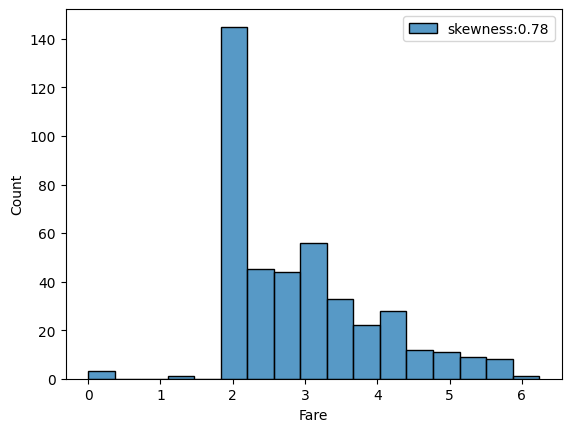

In [146]:
# 對數化處理fare值
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x>0 else 0)

# 查看fare分佈
farePlot = sb.histplot(df_test['Fare'][df_test['Fare'].notnull()],label = 'skewness:%.2f'%(df_test['Fare'].skew()))
farePlot.legend(loc='best')

# 結論: 調整後的圖形較為合理

# 3.特徵工程

In [147]:
# 將男性設為1，女性設為0，方便之後做分析
df_test['Sex'] = df_test['Sex'].map({"male": 1, "female": 0})

In [148]:
# 建構新特徵Title
# 使用.map填充特徵Title(依序把Name取出來轉換後填充到Title)
# 使用 .split() 方法將字串拆分出來，遇到','就拆分[1]只擷取第2個字串
# 使用 .split() 方法將字串拆分出來，遇到'.'就拆分[0]只擷取第1個字串
# Python strip() 方法用於移除字串頭尾指定的字元（預設為空格或換行符）
df_test['Title'] = df_test['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

# 查看Title資料分佈
df_test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [149]:
# 將Title資訊進行整合
test_TitleDict={}
test_TitleDict['Mr']='Mr'
test_TitleDict['Mlle']='Miss'
test_TitleDict['Miss']='Miss'
test_TitleDict['Master']='Master'
test_TitleDict['Jonkheer']='Master'
test_TitleDict['Mme']='Mrs'
test_TitleDict['Ms']='Mrs'
test_TitleDict['Mrs']='Mrs'
test_TitleDict['Don']='Royalty'
test_TitleDict['Sir']='Royalty'
test_TitleDict['the Countess']='Royalty'
test_TitleDict['Dona']='Royalty'
test_TitleDict['Lady']='Royalty'
test_TitleDict['Capt']='Officer'
test_TitleDict['Col']='Officer'
test_TitleDict['Major']='Officer'
test_TitleDict['Dr']='Officer'
test_TitleDict['Rev']='Officer'


# 用.map()把TitleDict依序填充至Title
df_test['Title'] = df_test['Title'].map(test_TitleDict)

# 查看Title資料分佈
df_test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,73
Master,21
Officer,5
Royalty,1


In [150]:
# 建構新特徵familyNum
# 在船上同為家族的父母及小孩的數目+在船上同為兄弟姐妹或配偶的數目+自己=家庭成員數量
df_test['familyNum'] = df_test['Parch'] + df_test['SibSp'] + 1
df_test['familyNum'].head(10)

,familyNum
0,1
1,2
2,1
3,1
4,3
5,1
6,1
7,3
8,1
9,3


In [151]:
# 建構新特徵Deck
# 提取Cabin(船艙號碼)字段首字母作為Deck(船艙類型)
df_test['Deck'] = df_test['Cabin'].map(lambda x: x[0])
df_test['Deck'].head(10)

,Deck
0,U
1,U
2,U
3,U
4,U
5,U
6,U
7,U
8,U
9,U


In [152]:
# 查看各票號的乘客數量
test_TickCountDict = {}
test_TickCountDict = df_test['Ticket'].value_counts()
test_TickCountDict.head()

,count
Ticket,
PC 17608,5
CA. 2343,4
113503,4
PC 17483,3
220845,3


In [153]:
# 將同票號乘客數量資料新增為新特徵TickCom(共同車票TicketCommon)
df_test['TickCom'] = df_test['Ticket'].map(test_TickCountDict)
df_test['TickCom'].head(10)

,TickCom
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [154]:
# 查看Age缺失值情況，等等用隨機森林模型預測缺失的數據
df_test[df_test['Age'].isnull()].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,Deck,TickCom
10,902,3,"Ilieff, Mr. Ylio",1,NaN,0,0,349220,2.066331,U,S,Mr,1,U,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,NaN,0,0,PC 17598,3.455790,U,S,Mrs,1,U,1
29,921,3,"Samaan, Mr. Elias",1,NaN,2,0,2662,3.076353,U,C,Mr,3,U,2
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,NaN,1,2,W./C. 6607,3.154870,U,S,Mrs,4,U,2
36,928,3,"Roth, Miss. Sarah A",0,NaN,0,0,342712,2.085672,U,S,Miss,1,U,1


In [155]:
# 篩選資料集
test_AgePre = df_test[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCom','Sex']]
test_AgePre.head()

,Age,Parch,Pclass,SibSp,Title,familyNum,TickCom,Sex
0,34.5,0,3,0,Mr,1,1,1
1,47.0,0,3,1,Mrs,2,1,0
2,62.0,0,2,0,Mr,1,1,1
3,27.0,0,3,0,Mr,1,1,1
4,22.0,1,3,1,Mrs,3,1,0


In [156]:
# 對test_AgePre進行one-hot編碼
# 獨熱編碼（One-Hot Encoding）是將離散特徵編碼的一種常用方法，其目的是將分類變數轉換為可用於機器學習演算法模型訓練的數字表示。
test_AgePre = pd.get_dummies(test_AgePre)
test_AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,34.5,0,3,0,1,1,1,False,False,True,False,False,False
1,47.0,0,3,1,2,1,0,False,False,False,True,False,False
2,62.0,0,2,0,1,1,1,False,False,True,False,False,False
3,27.0,0,3,0,1,1,1,False,False,True,False,False,False
4,22.0,1,3,1,3,1,0,False,False,False,True,False,False


In [157]:
# 對test_AgePre中的Parch進行one-hot編碼
test_ParAge = pd.get_dummies(test_AgePre['Parch'],prefix = 'Parch')
test_ParAge.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False


In [158]:
# 對test_AgePre中的SibSp和Pclass進行one-hot編碼
test_SibAge = pd.get_dummies(test_AgePre['SibSp'],prefix = 'SibSp')
test_PclAge = pd.get_dummies(test_AgePre['Pclass'],prefix = 'Pclass')
test_SibAge.head()
# test_ParAge.head()

,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,True,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False


In [159]:
# 根據相關性，拼接相關數據
test_AgePre = pd.concat([test_AgePre,test_ParAge,test_SibAge,test_PclAge],axis = 1)
test_AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCom,Sex,Title_Master,Title_Miss,Title_Mr,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,3,0,1,1,1,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1,47.0,0,3,1,2,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,62.0,0,2,0,1,1,1,False,False,True,...,True,False,False,False,False,False,False,False,True,False
3,27.0,0,3,0,1,1,1,False,False,True,...,True,False,False,False,False,False,False,False,False,True
4,22.0,1,3,1,3,1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [160]:
# 其實這邊可以直接拿剛剛訓練過的模型來直接預測，但複習一下

# 拆分訓練集和預測集
test_AgeKnown = test_AgePre[test_AgePre['Age'].notnull()]
test_AgeUnKnown = test_AgePre[test_AgePre['Age'].isnull()]

# 產生訓練集的特徵和標籤
test_AgeKnown_X = test_AgeKnown.drop(['Age'],axis=1)
test_AgeKnown_y = test_AgeKnown['Age']

# 產生預測集的特徵
test_AgeUnKnown_X = test_AgeUnKnown.drop(['Age'],axis=1)

# 利用隨機森林建構模型
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500,n_jobs = -1) # n_estimators:500棵樹 # n_jobs:全部cpu使用
rfr.fit(test_AgeKnown_X,test_AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [161]:
# 模型得分
rfr.score(test_AgeKnown_X,test_AgeKnown_y)

0.6747716322194879

In [162]:
# 預測年齡
test_AgeUnKnown_y = rfr.predict(test_AgeUnKnown_X)

# 填充預測數據
df_test.loc[df_test['Age'].isnull(),['Age']] = test_AgeUnKnown_y

# 此時已無缺失值
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
 12  familyNum    418 non-null    int64  
 13  Deck         418 non-null    object 
 14  TickCom      418 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 49.1+ KB


# 4.相關性分析

In [163]:
# 選擇可以量化的特徵
test_Sel = df_test.drop(['Cabin','Name','Ticket','PassengerId','Embarked','Title','Deck'],axis = 1)
test_Sel.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,familyNum,TickCom
0,3,1,34.5,0,0,2.057860,1,1
1,3,0,47.0,1,0,1.945910,2,1
2,2,1,62.0,0,0,2.270836,1,1
3,3,1,27.0,0,0,2.159003,1,1
4,3,0,22.0,1,1,2.508582,3,1


In [164]:
# 根據圖表刪除相關度很低的特徵
test_Sel = test_Sel.drop(['familyNum','SibSp','TickCom','Parch'],axis = 1)

# 顯示所選特徵
test_Sel.head()

,Pclass,Sex,Age,Fare
0,3,1,34.5,2.057860
1,3,0,47.0,1.945910
2,2,1,62.0,2.270836
3,3,1,27.0,2.159003
4,3,0,22.0,2.508582


# 5.訓練模型

In [165]:
# 設定特徵資料為test_preData_X
test_preData_X = test_Sel


# 檢查測試集特徵值與訓練集特徵值是否能對上
test_preData_X.shape

(418, 4)

In [166]:
# TitanicGBSmodle
test_GBCpreData_y = modelgsGBC.predict(test_preData_X)
test_GBCpreData_y = test_GBCpreData_y

# 導出預測結果
test_GBCpreResultDf = pd.DataFrame()
test_GBCpreResultDf['PassengerId'] = df_test['PassengerId']
test_GBCpreResultDf['Survived'] = test_GBCpreData_y

# 顯示預測結果
test_GBCpreResultDf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [167]:
# 將預測結果導出為csv文件
test_GBCpreResultDf.to_csv('./TitanicGBSmodle.csv',index=False)